### 환경 준비

In [7]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.4/390.3 MB 11.2 MB/s eta 0:00:35
    --------------------------------------- 5.0/390.3 MB 12.1 MB/s eta 0:00:32
    --------------------------------------- 7.6/390.3 MB 12.1 MB/s eta 0:00:32
   - -------------------------------------- 10.2/390.3 MB 12.3 MB/s eta 0:00:31
   - -------------------------------------- 12.6/390.3 MB 12.1 MB/s eta 0:00:32
   - -------------------------------------- 13.6/390.3 MB 10.8 MB/s eta 0:00:35
   - -------------------------------------- 14.9/390.3 MB 10.3 MB/s eta 0:00:37
   - -------------------------------------- 16.8/390.3 MB 10.1 MB/s eta 0:00:38
   - -------------------------------------- 18.9/390.3 MB 10.0 MB/s eta 0:00:38
   -- ------------------------------------- 21.2/390.3 MB 10.1 MB/s eta 0:00:37
   -- ------------------------------------- 23.6/390.3 MB 10.2 MB/s eta 0:00:37
   -- ------------------------------------- 26.0/390

In [45]:
import tensorflow as tf
tf.keras.utils.set_random_seed(20640)
tf.config.experimental.enable_op_determinism()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 데이터 준비하기

In [47]:
df = pd.read_csv("fetch_california_housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16184\3349289370.py:7: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16184\3349289370.py:7: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\moon\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\moon\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\moon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: U

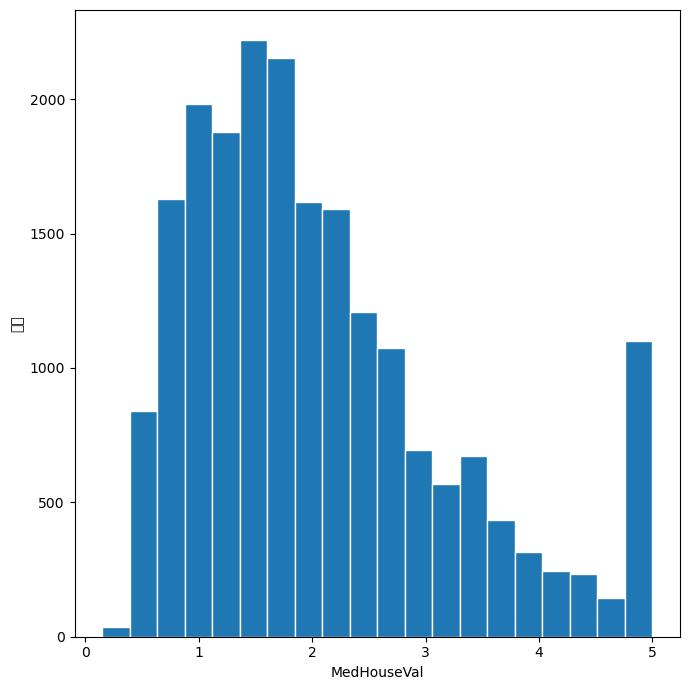

In [48]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(df['MedHouseVal'], bins=20, edgecolor='white')
ax.set_xlabel('MedHouseVal')
ax.set_ylabel('빈도')

plt.tight_layout()

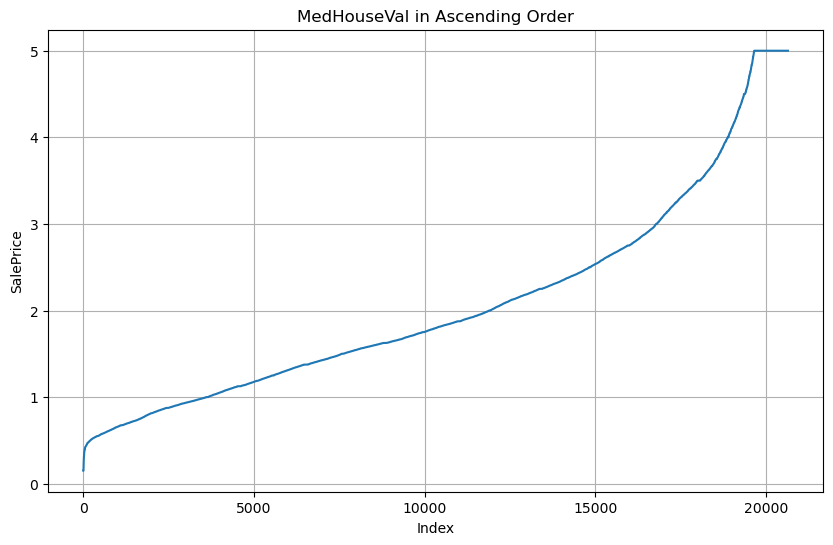

In [49]:
df_sorted = df['MedHouseVal'].sort_values()

df_sorted = df_sorted.reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(df_sorted)
plt.title('MedHouseVal in Ascending Order')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

In [50]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다.
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [51]:
print(np.unique(df['MedInc'], return_counts=True))

(array([ 0.4999,  0.536 ,  0.5495, ..., 14.9009, 15.    , 15.0001]), array([12, 10,  1, ...,  1,  2, 49], dtype=int64))


In [52]:
print(np.unique(df['AveRooms'], return_counts=True))
print(np.unique(df['AveBedrms'], return_counts=True))

(array([  0.84615385,   0.88888889,   1.        , ...,  62.42222222,
       132.53333333, 141.90909091]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
(array([ 0.33333333,  0.375     ,  0.44444444, ..., 15.3125    ,
       25.63636364, 34.06666667]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))


In [53]:
df.isnull().sum().sort_values(ascending=False).head(20)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 데이터 전처리
범주형(카테고리형) 변수, 결측치 처리하기

In [54]:
df = pd.get_dummies(df)

In [55]:
df.mean()

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

In [56]:
df = df.fillna(df.mean())
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 3. 속성별 관련도 추출하기

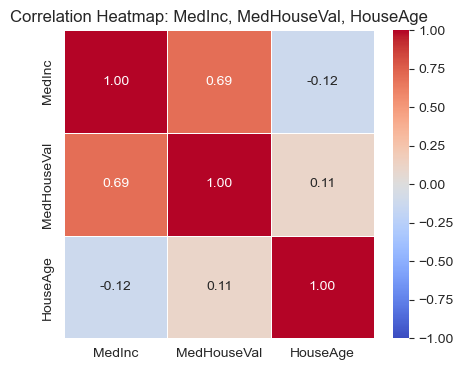

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

selected_cols = ['MedInc', 'MedHouseVal', 'HouseAge']
corr = df[selected_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)


plt.title("Correlation Heatmap: MedInc, MedHouseVal, HouseAge")

plt.show()



### 데이터 분할

In [100]:
cols_train=['MedInc', 'MedHouseVal', 'HouseAge']
X_train_pre = df[cols_train]

y = df['MedHouseVal'].values

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2, random_state=1, shuffle=True)

### 모델 구조 정의

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))                     

C:\Users\moon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,651 (6.45 KB)

 Trainable params: 1,651 (6.45 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [104]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['mape'])
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=20)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.keras"

checkpoint_cb = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/2000
379/387 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.9423 - mape: 38.1809 
Epoch 1: val_loss improved from inf to 0.04857, saving model to ./model/01-0.0486.keras
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9280 - mape: 37.8125 - val_loss: 0.0486 - val_mape: 9.3151
Epoch 2/2000
372/387 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0124 - mape: 4.4670
Epoch 2: val_loss improved from 0.04857 to 0.00098, saving model to ./model/02-0.0010.keras
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121 - mape: 4.3960 - val_loss: 9.7635e-04 - val_mape: 1.1617
Epoch 3/2000
372/387 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 7.9127e-04 - mape: 1.0998
Epoch 3: val_loss improved from 0.00098 to 0.00049, saving model to ./model/03-0.0005.keras
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9111e-04 - mape: 1.0984 - val_loss: 4.9043e-04 - val_mape: 0.8030
Epoch 4/2000
385/387 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 4.7002e-04 - mape: 0.8895
Epoch 4: val_loss improved from 0.

In [105]:
print(early_stopping_cb.stopped_epoch)

74


### 훈련(학습)과정 모니터링

In [106]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,mape,val_loss,val_mape
0,0.322668,22.197742,0.048566,9.315054
1,0.004974,2.720604,0.000976,1.161652
2,0.000783,1.064182,0.000490,0.802959
3,0.000500,0.867006,0.000304,0.632347
4,0.000331,0.717369,0.000191,0.466205
...,...,...,...,...
70,0.000015,0.142150,0.000055,0.426451
71,0.000018,0.170653,0.000022,0.123689
72,0.000188,0.526146,0.000945,1.643728
73,0.000197,0.613505,0.001074,1.758934


### 모델 평가(시험, Test) ; 주택 가격 예측 실행

In [108]:
real_prices =[]
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(50):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("{:02d} : 실제가격: {:.2f}, 예상가격: {:.2f}".format(i+1, real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
01 : 실제가격: 3.55, 예상가격: 3.58
02 : 실제가격: 0.71, 예상가격: 0.73
03 : 실제가격: 2.29, 예상가격: 2.33
04 : 실제가격: 1.12, 예상가격: 1.15
05 : 실제가격: 2.25, 예상가격: 2.28
06 : 실제가격: 2.63, 예상가격: 2.65
07 : 실제가격: 2.27, 예상가격: 2.28
08 : 실제가격: 1.66, 예상가격: 1.68
09 : 실제가격: 1.18, 예상가격: 1.20
10 : 실제가격: 1.56, 예상가격: 1.59
11 : 실제가격: 2.94, 예상가격: 2.97
12 : 실제가격: 0.97, 예상가격: 0.99
13 : 실제가격: 0.64, 예상가격: 0.66
14 : 실제가격: 3.15, 예상가격: 3.18
15 : 실제가격: 0.92, 예상가격: 0.94
16 : 실제가격: 1.17, 예상가격: 1.19
17 : 실제가격: 4.85, 예상가격: 4.88
18 : 실제가격: 1.42, 예상가격: 1.44
19 : 실제가격: 1.89, 예상가격: 1.91
20 : 실제가격: 2.29, 예상가격: 2.32
21 : 실제가격: 0.71, 예상가격: 0.73
22 : 실제가격: 1.08, 예상가격: 1.10
23 : 실제가격: 0.56, 예상가격: 0.58
24 : 실제가격: 1.74, 예상가격: 1.77
25 : 실제가격: 2.45, 예상가격: 2.48
26 : 실제가격: 0.93, 예상가격: 0.94
27 : 실제가격: 1.02, 예상가격: 1.04
28 : 실제가격: 2.56, 예상가격: 2.58
29 : 실제가격: 4.72, 예상가격: 4.77
30 : 실제가격: 1.23, 예상가격: 1.25
31 : 실제가격: 0.64, 예상가격: 0.66
32 : 실제가격: 1.28, 예상가격: 1.30
33 : 실제가격: 1.96, 예상가격: 1.98
34 : 실제가격: 0.65, 예상가격: 0.66
35 : 